## Bike sharing Case Study

#### Problem Statement:
#Bike-sharing company wants to know:

#Which variables are significant in predicting the demand for shared bikes.
#How well those variables describe the bike demands

In [224]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore') 

In [225]:
bike_org=pd.read_csv('Bike Sharing.csv')

In [226]:
bike_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [227]:
bike_org.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [228]:
bike_org.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


# DATA CLEANING

In [229]:
bike_org.nunique().sort_values()

yr              2
holiday         2
workingday      2
weathersit      3
season          4
weekday         7
mnth           12
temp          498
hum           594
casual        605
windspeed     649
registered    678
atemp         689
cnt           695
instant       730
dteday        730
dtype: int64

In [230]:
bike_org.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [231]:
bike=bike_org.drop(['instant','dteday','casual','registered'],axis=1)

#Instant will not contribute in analysis                        
#dteday is not needed as yr and month is there               
#casual + registered = cnt. Cnt is already there. So, casual and registered not needed       
#no null values and 1 unique values

# DATA PREPARATION

In [232]:
bike['weathersit']=bike['weathersit'].map({
1:"Clear_Few Clouds",2:"Mist_cloudy",3:"Light rain_Light snow_Thunderstorm",4:'Heavy Rain_Ice Pallets_Thunderstorm _Mist_Snow_Fog'})

In [233]:
bike['season'] = bike['season'].map({1: 'Spring',2:'Summer',3:'Fall',4:'Winter'})

In [234]:
bike['mnth'] = bike['mnth'].map ({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
    

In [235]:
bike['weekday']= bike['weekday'].map ({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})
    

In [236]:
bike.head()
#bike.shape

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,jan,0,sat,0,Mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,jan,0,sun,0,Mist_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,jan,0,mon,1,Clear_Few Clouds,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,jan,0,tue,1,Clear_Few Clouds,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,jan,0,wed,1,Clear_Few Clouds,9.305237,11.46350,43.6957,12.522300,1600


# EDA

# Handling Numeric variables

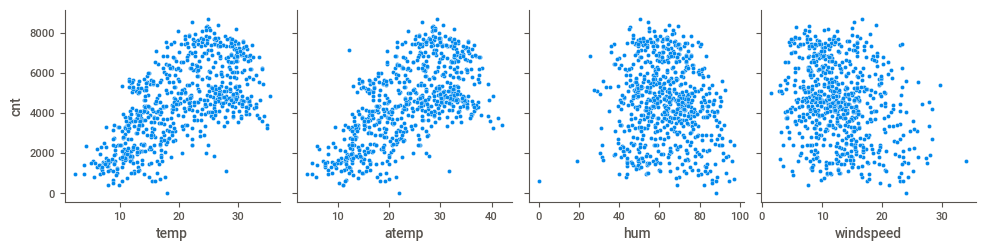

In [237]:
sns.pairplot(x_vars=['temp','atemp','hum','windspeed'],y_vars='cnt',data=bike)  
plt.show()

# Handling Category variables

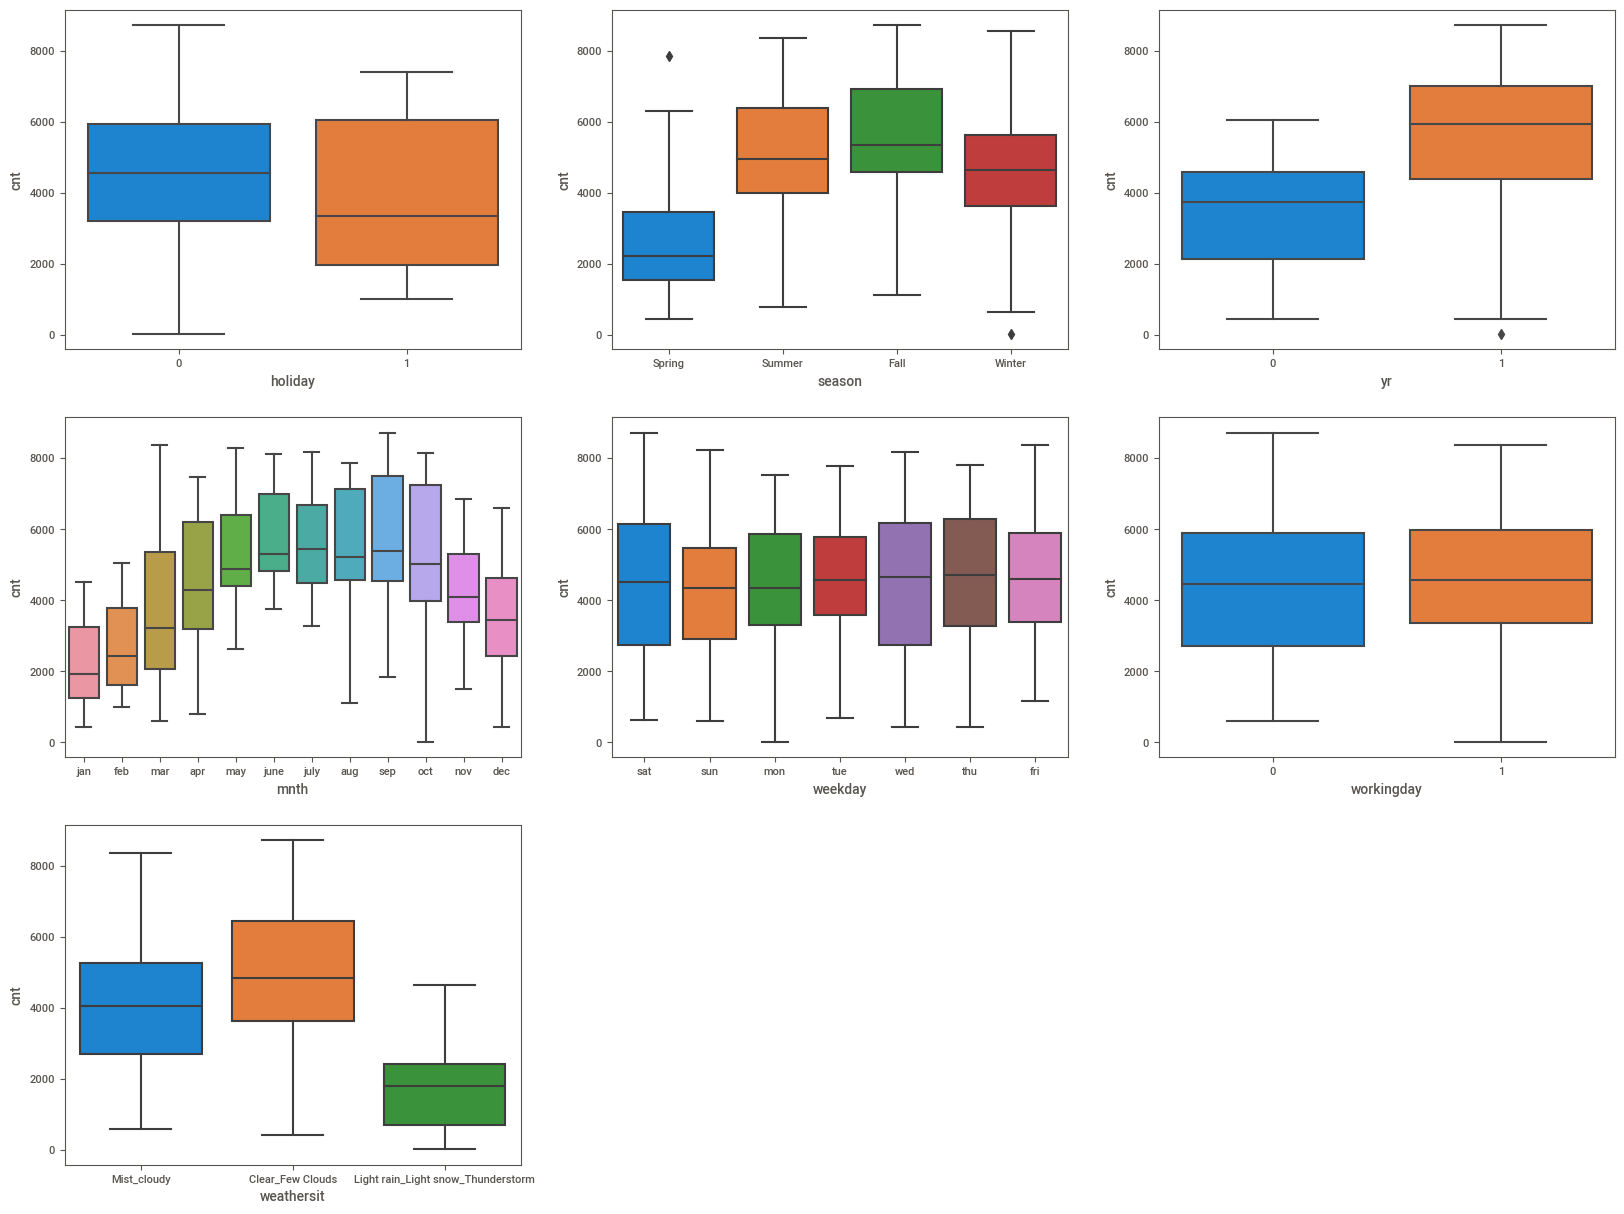

In [238]:
plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
sns.boxplot('holiday','cnt', data = bike)
plt.subplot(3,3,2)
sns.boxplot('season', 'cnt', data = bike)
plt.subplot(3,3,3)
sns.boxplot('yr', 'cnt', data = bike)
plt.subplot(3,3,4)
sns.boxplot('mnth', 'cnt', data = bike)
plt.subplot(3,3,5)
sns.boxplot('weekday',  'cnt', data = bike)
plt.subplot(3,3,6)
sns.boxplot('workingday', 'cnt', data = bike)
plt.subplot(3,3,7)
sns.boxplot('weathersit',  'cnt', data = bike)
plt.show()

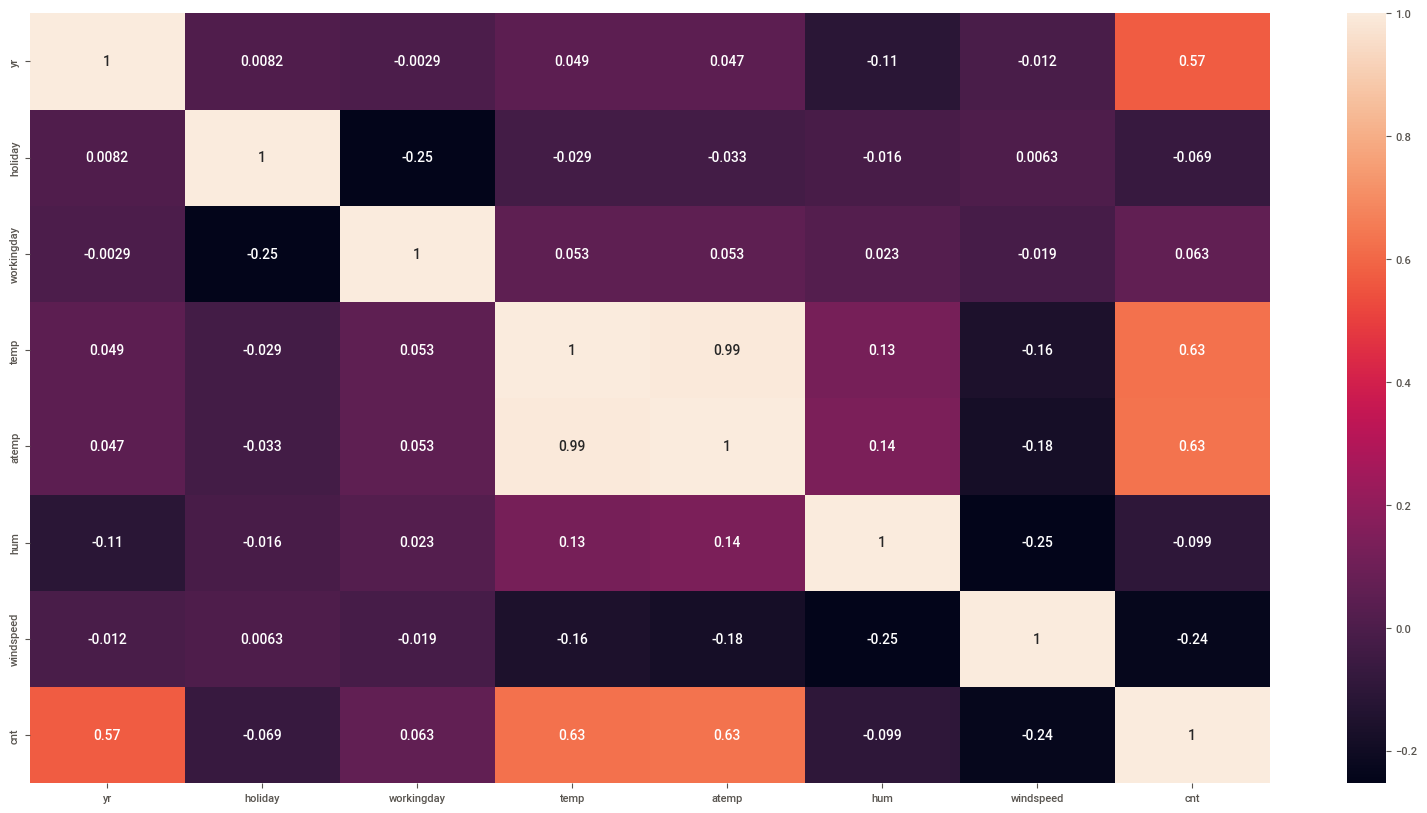

In [239]:
plt.figure(figsize=(20,10))
sns.heatmap(bike.corr(),annot=True)
plt.show()

#Observations    
#High corelation between Temp and atemp       
#There is a linear relationship between temp and bike demand   
#The bike demand was higher in 2019 than 2018  
#The bike demand did not have much difference even if its working day or holiday or any particular day of week   
#The demand for bikes was highest during fall season particularly in Sept and Oct
#The spike in demand for bikes was higher on Clear Few clouds days

# Handling categorical to Dummy variables

In [240]:

mnthNew=pd.get_dummies(bike.mnth,drop_first=True)
weekdayNew=pd.get_dummies(bike.weekday,drop_first=True)
seasonNew=pd.get_dummies(bike.season,drop_first=True)
weathersitNew=pd.get_dummies(bike.weathersit,drop_first=True)

In [241]:
seasonNew.head()

,Spring,Summer,Winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [242]:
mnthNew.head()

,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [243]:
weekdayNew.head()

,mon,sat,sun,thu,tue,wed
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1


In [244]:
weathersitNew.head()

,Light rain_Light snow_Thunderstorm,Mist_cloudy
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [245]:
bike=pd.concat([bike,seasonNew],axis=1)
bike=pd.concat([bike,mnthNew],axis=1)
bike=pd.concat([bike,weekdayNew],axis=1)
bike=pd.concat([bike,weathersitNew],axis=1)

In [246]:
bike.head()#determine variables are concatenated

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,oct,sep,mon,sat,sun,thu,tue,wed,Light rain_Light snow_Thunderstorm,Mist_cloudy
0,Spring,0,jan,0,sat,0,Mist_cloudy,14.110847,18.18125,80.5833,...,0,0,0,1,0,0,0,0,0,1
1,Spring,0,jan,0,sun,0,Mist_cloudy,14.902598,17.68695,69.6087,...,0,0,0,0,1,0,0,0,0,1
2,Spring,0,jan,0,mon,1,Clear_Few Clouds,8.050924,9.47025,43.7273,...,0,0,1,0,0,0,0,0,0,0
3,Spring,0,jan,0,tue,1,Clear_Few Clouds,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,1,0,0,0
4,Spring,0,jan,0,wed,1,Clear_Few Clouds,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,1,0,0


In [247]:
#Dropping atemp
bike.drop(['atemp','season','mnth','weekday','weathersit'],axis=1,inplace=True)

In [248]:
bike.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,...,oct,sep,mon,sat,sun,thu,tue,wed,Light rain_Light snow_Thunderstorm,Mist_cloudy
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


# Data Split

In [249]:

bike_train,bike_test=train_test_split(bike,train_size=0.7,random_state=100)

# Scaling New Features

In [250]:
from sklearn.preprocessing import MinMaxScaler

In [251]:
scaler = MinMaxScaler()

In [252]:
#Scaling Numerical features
x_vars=['temp','hum','windspeed','cnt']

bike_train[x_vars] = scaler.fit_transform(bike_train[x_vars])

In [253]:
bike_train[x_vars]

,temp,hum,windspeed,cnt
576,0.815169,0.725633,0.264686,0.827658
426,0.442393,0.640189,0.255342,0.465255
728,0.245101,0.498067,0.663106,0.204096
482,0.395666,0.504508,0.188475,0.482973
111,0.345824,0.751824,0.380981,0.191095
...,...,...,...,...
578,0.863973,0.679690,0.187140,0.832835
53,0.202618,0.435939,0.111379,0.218017
350,0.248216,0.577930,0.431816,0.312586
79,0.462664,0.759870,0.529881,0.236424


# Creating Xtrain and Ytrain

In [254]:
y_train=bike_train.pop('cnt')
X_train = bike_train

In [255]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [256]:
# model building
lm=LinearRegression()
lm.fit(X_train,y_train)
# Pass model to RFE and  number of var to choose)
rfe= RFE(lm,n_features_to_select = 10)

In [258]:
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=10)

In [260]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Spring', False, 2),
 ('Summer', True, 1),
 ('Winter', True, 1),
 ('aug', False, 11),
 ('dec', False, 8),
 ('feb', False, 9),
 ('jan', False, 6),
 ('july', True, 1),
 ('june', False, 18),
 ('mar', False, 19),
 ('may', False, 10),
 ('nov', False, 7),
 ('oct', False, 17),
 ('sep', True, 1),
 ('mon', False, 13),
 ('sat', False, 4),
 ('sun', False, 12),
 ('thu', False, 15),
 ('tue', False, 14),
 ('wed', False, 16),
 ('Light rain_Light snow_Thunderstorm', True, 1),
 ('Mist_cloudy', False, 3)]

In [261]:
col=X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'Summer', 'Winter', 'july',
       'sep', 'Light rain_Light snow_Thunderstorm'],
      dtype='object')

In [262]:
X_train_rfe=X_train[col]

#Add constant

In [265]:
import statsmodels.api as sm

# Add a constant
X_train_rfe = sm.add_constant(X_train_rfe)
X_train_rfe

,const,yr,holiday,temp,hum,windspeed,Summer,Winter,july,sep,Light rain_Light snow_Thunderstorm
576,1.0,1,0,0.815169,0.725633,0.264686,0,0,1,0,0
426,1.0,1,0,0.442393,0.640189,0.255342,0,0,0,0,0
728,1.0,1,0,0.245101,0.498067,0.663106,0,0,0,0,0
482,1.0,1,0,0.395666,0.504508,0.188475,1,0,0,0,0
111,1.0,0,0,0.345824,0.751824,0.380981,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0,0.863973,0.679690,0.187140,0,0,0,0,0
53,1.0,0,0,0.202618,0.435939,0.111379,0,0,0,0,0
350,1.0,0,0,0.248216,0.577930,0.431816,0,1,0,0,0
79,1.0,0,0,0.462664,0.759870,0.529881,1,0,0,0,0


In [266]:
lr = sm.OLS(y_train, X_train_rfe).fit()#Running linear model
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     247.6
Date:                Thu, 09 Feb 2023   Prob (F-statistic):          2.79e-186
Time:                        00:52:24   Log-Likelihood:                 494.18
No. Observations:                 510   AIC:                            -966.4
Df Residuals:                     499   BIC:                            -919.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.2682      0.026     10.292      0.000       0.217       0.319
yr                                     0.2259      0.008     27.118      0.000       0.210       0.242
holiday                               -0.0930      0.026     -3.543      0.000      -0.145      -0.041
temp                                   0.6200      0.023     27.492      0.000       0.576       0.664
hum                                   -0.2868      0.032     -9.045      0.000      -0.349      -0.224
windspeed                             -0.2059      0.026     -7.889      0.000      -0.257      -0.155
Summer                                 0.0800      0.011      7.281      0.000       0.058       0.102
Winter                                 0.1390      0.011     12.903      0.000       0.118       0.160
july                                  -0.0482      0.018     -2.606      0.009      -0.085      -0.012
sep                                    0.0944      0.016      5.724      0.000       0.062       0.127
Light rain_Light snow_Thunderstorm    -0.1914      0.026     -7.470      0.000      -0.242      -0.141
==============================================================================
Omnibus:                       53.056   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               92.833
Skew:                          -0.655   Prob(JB):                     6.94e-21
Kurtosis:                       4.629   Cond. No.                         15.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#p-value for all the variables is < 0.05

#r2 = 82%

In [268]:
X_train_rfe.columns

Index(['const', 'yr', 'holiday', 'temp', 'hum', 'windspeed', 'Summer',
       'Winter', 'july', 'sep', 'Light rain_Light snow_Thunderstorm'],
      dtype='object')

In [269]:
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

# Calculate VIF to decide which variable is not needed

In [271]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [272]:
vif = pd.DataFrame()
X=X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,10.29
2,temp,9.29
4,windspeed,3.54
0,yr,2.02
5,Summer,1.76
6,Winter,1.68
7,july,1.55
8,sep,1.29
9,Light rain_Light snow_Thunderstorm,1.09
1,holiday,1.04


In [280]:
#COLUMN hum HAS A VERY HIGH VIF SO WE DROP IT ,We tend to keep VIF equal to 5

In [275]:
X_train_rfe = X_train_rfe.drop(['hum'], axis=1)

In [276]:
# Add a constant
X_train_rfe = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_rfe).fit()#Running linear model
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     229.0
Date:                Thu, 09 Feb 2023   Prob (F-statistic):          4.42e-171
Time:                        01:08:44   Log-Likelihood:                 455.47
No. Observations:                 510   AIC:                            -890.9
Df Residuals:                     500   BIC:                            -848.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.0840      0.018      4.794      0.000       0.050       0.118
yr                                     0.2329      0.009     26.061      0.000       0.215       0.251
holiday                               -0.0875      0.028     -3.094      0.002      -0.143      -0.032
temp                                   0.5854      0.024     24.438      0.000       0.538       0.632
windspeed                             -0.1459      0.027     -5.365      0.000      -0.199      -0.092
Summer                                 0.0750      0.012      6.346      0.000       0.052       0.098
Winter                                 0.1228      0.011     10.731      0.000       0.100       0.145
july                                  -0.0313      0.020     -1.578      0.115      -0.070       0.008
sep                                    0.0822      0.018      4.640      0.000       0.047       0.117
Light rain_Light snow_Thunderstorm    -0.2524      0.027     -9.477      0.000      -0.305      -0.200
==============================================================================
Omnibus:                       60.888   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              103.629
Skew:                          -0.747   Prob(JB):                     3.14e-23
Kurtosis:                       4.625   Cond. No.                         10.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [278]:
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [279]:
vif = pd.DataFrame()
X=X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.96
3,windspeed,3.01
0,yr,2.00
4,Summer,1.75
6,july,1.51
5,Winter,1.43
7,sep,1.28
8,Light rain_Light snow_Thunderstorm,1.06
1,holiday,1.03


In [281]:
#Since VIF of temp is nearly equal to 5, we dont drop it

In [282]:
y_train_pred=lr.predict(sm.add_constant(X_train_rfe))

# Residual analysis

In [283]:
y_train_pred

576    0.724180
426    0.538633
728    0.363635
482    0.596066
111    0.305855
         ...   
578    0.795361
53     0.186350
350    0.289101
79     0.352516
520    0.690831
Length: 510, dtype: float64

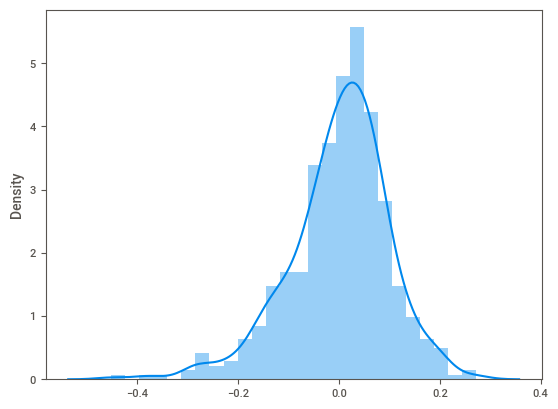

In [284]:
res=y_train-y_train_pred
sns.distplot(res)
plt.show()

In [285]:
#normal distribution centred around 0 

# Making Predictions

In [286]:
bike_test[x_vars] = scaler.transform(bike_test[x_vars])

In [287]:
#Create xtrain and ytrain
y_test = bike_test.pop('cnt')
X_test = bike_test

In [288]:

X_test_rfe = X_test[X_train_rfe.columns]
# Adding a constant variable 
X_test_rfe = sm.add_constant(X_test_rfe)

# Model evaluation

In [292]:
#predict.
y_test_pred=lr.predict(X_test_rfe)

In [293]:
#evaluate the model
from sklearn.metrics import r2_score

In [294]:
r2_score(y_true=y_test,y_pred=y_test_pred)

0.7717629996668943

In [295]:
#r_squared on the test set is 0.805 and the r-squared on the trained set 0.7717
#which is quiet reasonable and nearly equal, which means that whatever data 
#the model was trained with, it has been almost able to apply those learnings in the test data.


# Model Evaluation

In [298]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     229.0
Date:                Thu, 09 Feb 2023   Prob (F-statistic):          4.42e-171
Time:                        01:34:03   Log-Likelihood:                 455.47
No. Observations:                 510   AIC:                            -890.9
Df Residuals:                     500   BIC:                            -848.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.0840      0.018      4.794      0.000       0.050       0.118
yr                                     0.2329      0.009     26.061      0.000       0.215       0.251
holiday                               -0.0875      0.028     -3.094      0.002      -0.143      -0.032
temp                                   0.5854      0.024     24.438      0.000       0.538       0.632
windspeed                             -0.1459      0.027     -5.365      0.000      -0.199      -0.092
Summer                                 0.0750      0.012      6.346      0.000       0.052       0.098
Winter                                 0.1228      0.011     10.731      0.000       0.100       0.145
july                                  -0.0313      0.020     -1.578      0.115      -0.070       0.008
sep                                    0.0822      0.018      4.640      0.000       0.047       0.117
Light rain_Light snow_Thunderstorm    -0.2524      0.027     -9.477      0.000      -0.305      -0.200
==============================================================================
Omnibus:                       60.888   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              103.629
Skew:                          -0.747   Prob(JB):                     3.14e-23
Kurtosis:                       4.625   Cond. No.                         10.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#Coefficient of best fitted line
#cnt=0.2329 * yr - (0.0875*holiday) + (0.5854*temp) - (0.1459*windspeed) + (0.0750 *summer) + (0.1228* winter) - (0.0313*july)+(0.0822*sep) -(0.2524 * Light_rain)

#Conclusion  
#Model is able to predict with approx 80% accuracy  
#With an increase in temperature the demand also increases  
#temperature , season (Summer or winter) and month explain rise in demand  